In [1]:
using Random, LinearAlgebra, Plots, Statistics

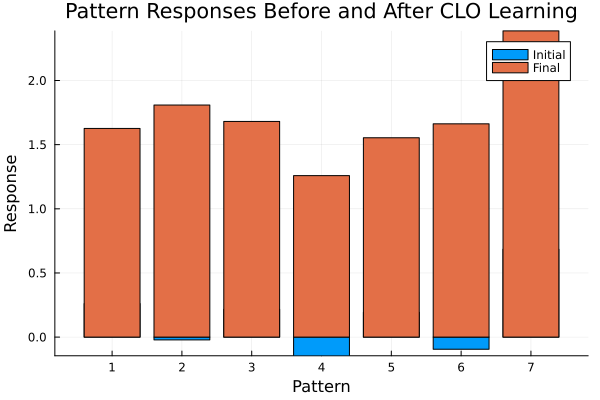

In [2]:
# パラメータ設定
num_patterns = 7
input_dim = 10
timesteps = 3000

γ = 0.9999              # 忘却率
η_plus = 0.035
η_minus = 0.017
θ_c = 0.3               # 可塑性閾値
θ_max = 1.05            # 出力飽和上限

# 入力パターンとノイズの設定
Random.seed!(0)
d_patterns = [rand(Float64, input_dim) .* 2 .- 1 for _ in 1:num_patterns]  # 可塑的入力
b_patterns = [rand(Float64, input_dim) .* 2 .- 1 for _ in 1:num_patterns]  # 非可塑的入力

# 初期重み
m = randn(input_dim) .* 0.1             # 可塑的
z = randn(input_dim) .* 0.1             # 非可塑的（固定）

# 応答記録用
responses_initial = zeros(num_patterns)
responses_final = zeros(num_patterns)

# 応答初期状態（t=0）を記録
for i in 1:num_patterns
    y = dot(m, d_patterns[i]) + dot(z, b_patterns[i])
    responses_initial[i] = y
end

# 学習ループ
for t in 1:timesteps
    k = rand(1:num_patterns)
    r = rand(Float64, input_dim) .* 0.6 .- 0.3  # ノイズ r(t)
    s = rand(Float64, input_dim) .* 0.6 .- 0.3  # ノイズ s(t)
    x = rand(Float64) * 1.0 - 0.5               # チャネルノイズ

    d_input = d_patterns[k] .+ r
    b_input = b_patterns[k] .+ s
    y = dot(m, d_input) + dot(z, b_input) + x

    # CLO則
    Δm = zeros(input_dim)
    if y < θ_c
        Δm = -η_minus * y .* d_input
    elseif y < θ_max
        Δm = η_plus * (θ_max - y) .* d_input
    end

    m = γ .* m .+ Δm
end

# 応答最終状態を記録
for i in 1:num_patterns
    y = dot(m, d_patterns[i]) + dot(z, b_patterns[i])
    responses_final[i] = y
end

# 描画
bar(1:num_patterns, [responses_initial responses_final],
    label=["Initial" "Final"], legend=:topright,
    title="Pattern Responses Before and After CLO Learning",
    xlabel="Pattern", ylabel="Response")

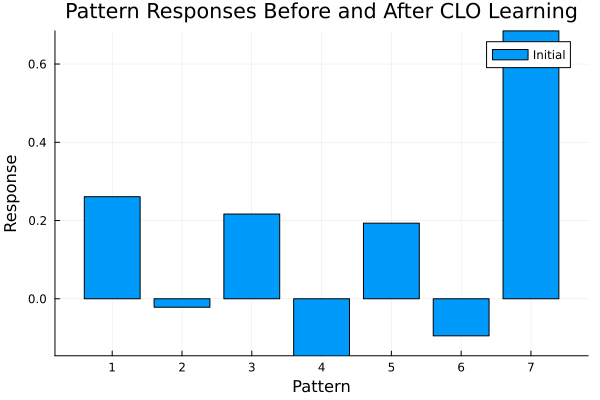

In [3]:
# 描画
bar(1:num_patterns, responses_initial,
    label="Initial", legend=:topright,
    title="Pattern Responses Before and After CLO Learning",
    xlabel="Pattern", ylabel="Response")